In [ ]:
import math
import numpy as np
import pandas as pd
import os
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
# SQLite Table
import sqlite3
import copy
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Raw Data

### Days In Hospital

In [ ]:
DIH2 = pd.read_csv('Data/DaysInHospital_Y2.csv')
print('Days in Hospital year 2 data shape: ', DIH2.shape)
DIH2.head()

In [ ]:
DIH2['DaysInHospital'].value_counts().plot(kind='bar')

In [ ]:
DIH3 = pd.read_csv('Data/DaysInHospital_Y3.csv')
print('Days in Hospital year 2 data shape: ', DIH3.shape)
DIH3.head()

In [ ]:
DIH2['DaysInHospital'].value_counts().plot(kind='bar')

In [ ]:
print('Check null in DayInHospital Y2') 
display(DIH2.isnull().sum())
print('Check null in DayInHospital Y3') 
display(DIH3.isnull().sum())

### Members

In [ ]:
Members = pd.read_csv('Data/HHP_release3/Members.csv')
print('Members data shape: ', Members.shape)
Members.head()

In [ ]:
Members['AgeAtFirstClaim'].value_counts().plot(kind='bar')

In [ ]:
Members['Sex'].value_counts().plot(kind='bar')

In [ ]:
print('Check null in Members Data') 
display(Members.isnull().sum())

### Drug count data

In [ ]:
DrugCount = pd.read_csv('Data/HHP_release3/DrugCount.csv')
print('DrugCount data shape: ', DrugCount.shape)
DrugCount.head()

In [ ]:
DrugCount.drop(DrugCount[DrugCount["Year"] == "Y3"].index)
DrugCount.head()

In [ ]:
#Null check
display(DrugCount.isnull().sum())

In [ ]:
DrugCount['DrugCount'].value_counts().plot(kind='bar')

In [ ]:
DrugCount[DrugCount["Year"] == "Y1"]['DrugCount'].value_counts().plot(kind='bar',title='DrugCountin Year 1')

In [ ]:
DrugCount[DrugCount["Year"] == "Y2"]['DrugCount'].value_counts().plot(kind='bar',title='DrugCount in Year 2')

### LabCount

In [ ]:
LabCount = pd.read_csv('Data/HHP_release3/LabCount.csv')
print('LabCount data shape: ', LabCount.shape)
LabCount.head()

In [ ]:
LabCount.drop(LabCount[LabCount["Year"] == "Y3"].index)
#Null check
display(LabCount.isnull().sum())

In [ ]:
#DSFS
LabCount['DSFS'].value_counts().plot(kind='bar')

In [ ]:
LabCount[LabCount["Year"] == "Y1"]['LabCount'].value_counts().plot(kind='bar',title='LabCount in Year 1')

In [ ]:
LabCount[LabCount["Year"] == "Y2"]['DSFS'].value_counts().plot(kind='bar',title='DFSF in Year 2')

In [ ]:
#LabCount: count the unique laboratory and patholoty tests by DSFS
#Value above 9 - 95% quantile are top coded as 10+
LabCount['LabCount'].value_counts().plot(kind='bar')

In [ ]:
LabCount[LabCount["Year"] == "Y1"]['LabCount'].value_counts().plot(kind='bar',title='LabCount in Year 1')

In [ ]:
LabCount[LabCount["Year"] == "Y2"]['LabCount'].value_counts().plot(kind='bar',title='LabCount in Year 2')

### Claims

In [ ]:
Claims = pd.read_csv('Data/HHP_release3/Claims.csv')
print('Claims data shape: ', Claims.shape)
Claims.head()

In [ ]:
Claims.drop(Claims[Claims["Year"] == "Y3"].index)
#Null check
display(Claims.isnull().sum())

In [ ]:
Feature={'ProviderID',
         'Vendor',                     
         'PCP',                         
         'Year',                          
         'Specialty',
         'PlaceSvc',
         #'PayDelay', use histogram
         'LengthOfStay',
         'DSFS',
         'PrimaryConditionGroup',      
         'CharlsonIndex',                 
         'ProcedureGroup',              
         'SupLOS'          }
#Feature=list(Feature)

In [ ]:
def plot_cat_data(df, col, ax):
    s_count = df[col].value_counts()
    x = s_count.index.tolist()
    y = s_count.values
    df_bar = pd.DataFrame({col: x, "count": y}, columns=[col, "count"])
    df_bar.plot.bar(x=col, y="count", rot=0, ax=ax)
    
ncols=3
i=0
for var in Feature:
    i+=1/len(Feature)
    j=i % ncols
   # Claims[var].value_counts().plot(kind='bar',title='Speciality',ax=axes[i, j])
    #plot_cat_data(Claims, var, ax=axes[i, j])

### Plot automatically bar chart on each categorical data (total, Y1, Y2)?

In [ ]:
Claims['Specialty'].value_counts().plot(kind='bar',title='Speciality')

In [ ]:
Claims[Claims["Year"] == "Y1"]["Specialty"].value_counts().plot(kind='bar',title='Speciality in Y1')

In [ ]:
Claims[Claims["Year"] == "Y2"]["Specialty"].value_counts().plot(kind='bar',title='Specialty in Y2')

In [ ]:
Claims["PlaceSvc"].value_counts().plot(kind='bar',title='PlaceSvc')

In [ ]:
Claims[Claims["Year"] == "Y1"]["PlaceSvc"].value_counts().plot(kind='bar',title='PlaceSvc in Y1')

In [ ]:
Claims[Claims["Year"] == "Y2"]["PlaceSvc"].value_counts().plot(kind='bar',title='PlaceSvc in Y2')

In [ ]:
Claims['PayDelay'].value_counts().plot.hist(title='PayDelay')

In [ ]:
Claims[Claims["Year"] == "Y1"]['PayDelay'].value_counts().plot(kind='bar',title='PayDelay in Year 1')

In [ ]:
Claims[Claims["Year"] == "Y2"]['PayDelay'].value_counts().plot(kind='bar',title='PayDelay in Year 2')

In [ ]:
Claims['LengthOfStay'].value_counts().plot(kind='bar',title='LengthOfStay')

In [ ]:
Claims[Claims["Year"] == "Y1"]['LengthOfStay'].value_counts().plot(kind='bar',title='LengthOfStay in Year 1')

In [ ]:
Claims[Claims["Year"] == "Y2"]['LengthOfStay'].value_counts().plot(kind='bar',title='LengthOfStay in Year 2')

In [ ]:
Claims['DSFS'].value_counts().plot(kind='bar',title='DSFS')

In [ ]:
Claims[Claims["Year"] == "Y1"]['DSFS'].value_counts().plot(kind='bar',title='DSFS in Year 1')

In [ ]:
Claims[Claims["Year"] == "Y2"]['DSFS'].value_counts().plot(kind='bar',title='DSFS in Year 2')

PrimaryConditionGroup

In [ ]:
Claims['PrimaryConditionGroup'].value_counts().plot(kind='bar',title='PrimaryConditionGroup')

In [ ]:
Claims[Claims["Year"] == "Y1"]['PrimaryConditionGroup'].value_counts().plot(kind='bar',title='PrimaryConditionGroup in Year 1')

In [ ]:
Claims[Claims["Year"] == "Y2"]['PrimaryConditionGroup'].value_counts().plot(kind='bar',title='PrimaryConditionGroup in Year 2')

In [ ]:
Claims['CharlsonIndex'].value_counts().plot(kind='bar',title='CharlsonIndex')

In [ ]:
Claims[Claims["Year"] == "Y1"]['CharlsonIndex'].value_counts().plot(kind='bar',title='CharlsonIndex in Year 1')

In [ ]:
Claims[Claims["Year"] == "Y2"]['CharlsonIndex'].value_counts().plot(kind='bar',title='CharlsonIndex in Year 2')

In [ ]:
Claims['ProcedureGroup'].value_counts().plot(kind='bar',title='ProcedureGroup')

In [ ]:
Claims[Claims["Year"] == "Y1"]['ProcedureGroup'].value_counts().plot(kind='bar',title='ProcedureGroup in Year 1')

In [ ]:
Claims[Claims["Year"] == "Y2"]['ProcedureGroup'].value_counts().plot(kind='bar',title='ProcedureGroup in Year 2')

In [ ]:
Claims['SupLOS'].value_counts().plot(kind='bar',title='SupLOS')

In [ ]:
Claims[Claims["Year"] == "Y1"]['SupLOS'].value_counts().plot(kind='bar',title='SupLOS in Year 1')

In [ ]:
Claims[Claims["Year"] == "Y2"]['SupLOS'].value_counts().plot(kind='bar',title='SupLOS in Year 2')

# Processed data

In [ ]:
train = pd.read_csv('Data/train_data_hhp.csv')
test = pd.read_csv('Data/test_data_hhp.csv')

ps_dictionary= pd.read_csv('Data/ps_dictionary.csv')
ps=list(ps_dictionary['Shorten Name'])
pcg_dictionary= pd.read_csv('Data/pcg_dictionary.csv')
pcg=list(pcg_dictionary['Shorten Name'])
pg_dictionary= pd.read_csv('Data/pg_dictionary.csv')
pg=list(pg_dictionary['Shorten Name'])
sp_dictionary= pd.read_csv('Data/sp_dictionary.csv')
sp=list(sp_dictionary['Shorten Name'])
property_count=['no_Providers', 'no_Vendors', 'no_PCPs', 'no_PlaceSvcs',
       'no_Specialities', 'no_PrimaryConditionGroups', 'no_ProcedureGroups']
property_max=['PayDelay_max', 'LOS_max', 'dsfs_max', 'CharlsonIndexI_max']
property_min=['PayDelay_min', 'LOS_min', 'dsfs_min', 'CharlsonIndexI_min']
property_ave=['PayDelay_ave', 'LOS_ave', 'dsfs_ave', 'CharlsonIndexI_ave']
property_std=['PayDelay_stdev', 'LOS_stdev', 'dsfs_stdev', 'CharlsonIndexI_stdev'] #drop CharlsonIndex, PayDelay
property_range=['CharlsonIndexI_range']
los=['los_tot_unknown', 'los_tot_suppressed', 'los_tot_known']

property_LabCount=['labCount_min', 'labCount_max', 'labCount_ave', 'labcount_months','labNull']

property_DrugCount=['DrugCountMin', 'DrugCountMax', 'DrugCountMean', 'DrugCount','drugNull']
age= ['age_05', 'age_15', 'age_25',
       'age_35', 'age_45', 'age_55', 'age_65',
      'age_75', 'age_85', 'age_MISS']
sex=[ 'sexMALE', 'sexFEMALE', 'sexMISS']

### Correlation

In [ ]:
corr = train[list(set(property_count).union(set(los)))].corr()

corr.style.background_gradient().set_precision(2)

In [ ]:
corr = train[list(set(property_max).union(set(los)))].corr()

corr.style.background_gradient().set_precision(2) 

In [ ]:
corr = train[list(set(property_min).union(set(los)))].corr()
corr.style.background_gradient().set_precision(2)

In [ ]:
corr = train[list(set(property_ave).union(set(los)))].corr()
corr.style.background_gradient().set_precision(2)

In [ ]:
corr = train[list(set(property_LabCount).union(set(los)))].corr()

corr.style.background_gradient().set_precision(2)

In [ ]:
corr = train[list(set(property_DrugCount).union(set(los)))].corr()

corr.style.background_gradient().set_precision(2)

In [ ]:
X=train.drop(['Year','ClaimsTruncated','MemberID'],axis=1, inplace=False)

In [ ]:
corr = X.corr()
corr.style.background_gradient().set_precision(2)

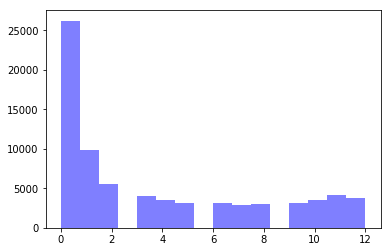

In [127]:
num_bins = 16
n, bins, patches = plt.hist(X['DrugCount'], num_bins, facecolor='blue', alpha=0.5)
plt.show()